In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('images/specific_clips/model_x/frame39.jpg')

In [3]:
wheel_diameter = 558.8
wheel_radius = wheel_diameter / 2.0

In [4]:
def line_eqn(x, m, point):
    return int(point[1] + m * (x - point[0]))

In [5]:
roof_prop = (1150 - 730) / (1650 - 730)
roof_dist = 4751 * roof_prop

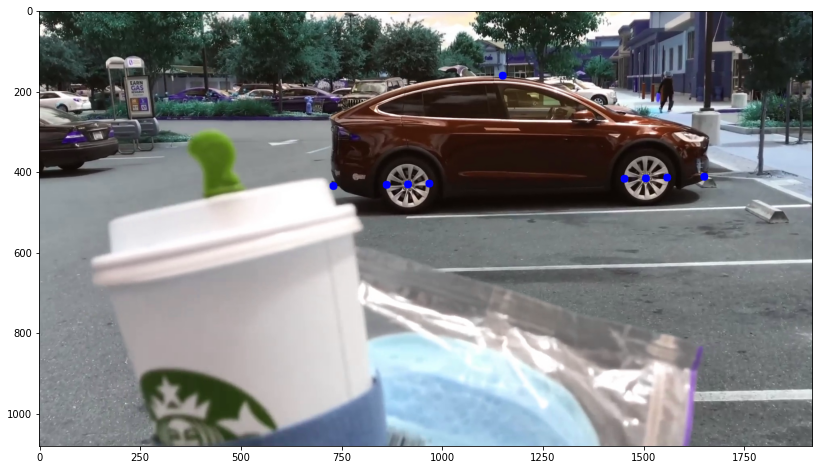

In [6]:
points = {
    'rear_wheel': (915, 430),
    'front_wheel': (1505, 415),
    'roof': (1150, 160)
}

m = (points['front_wheel'][1] - points['rear_wheel'][1]) / (points['front_wheel'][0] - points['rear_wheel'][0])

img = image.copy()

img = cv2.circle(img, points['rear_wheel'], radius=10, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, points['front_wheel'], radius=10, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, points['roof'], radius=10, color=(0, 0, 255), thickness=-1)

vehicle_points = [730, 862, 968, 1452, 1558, 1650]

for i, point in enumerate(vehicle_points):
    points[str(i)] = (point, line_eqn(point, m, points['rear_wheel']))
    img = cv2.circle(img, (point, line_eqn(point, m, points['rear_wheel'])), radius=10, color=(0, 0, 255), thickness=-1)

plt.figure(figsize=(15, 8))
plt.imshow(img)

In [7]:
cv2.imwrite('images/output_images/model_x.png', img)

True

In [8]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [9]:
image = cv2.imread('images/specific_clips/macbook_pro/frame48.jpg')

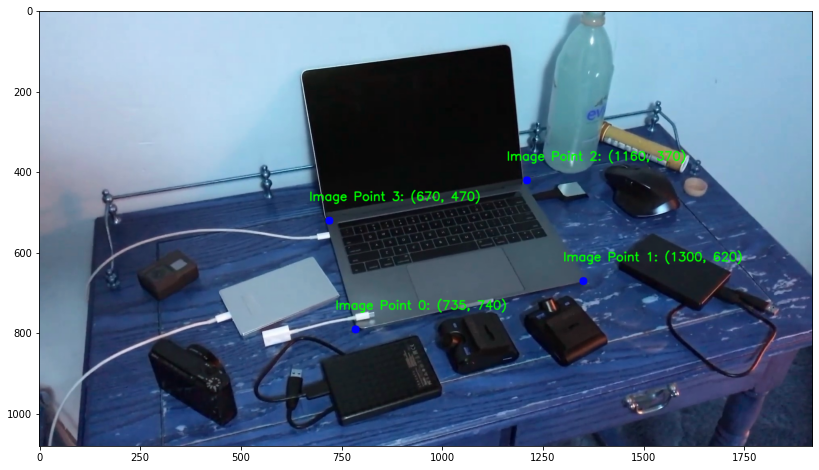

In [10]:
mac_points = {
    'left_lower': (785, 790),
    'right_lower': (1350, 670),
    'right_upper': (1210, 420),
    'left_upper': (720, 520)
}

img = image.copy()

for key in mac_points.keys():
    img = cv2.circle(img, mac_points[key], radius=10, color=(0, 0, 255), thickness=-1)

font = cv2.FONT_HERSHEY_SIMPLEX
for i, point in enumerate(mac_points):
    p1 = mac_points[point][0] - 50
    p2 = mac_points[point][1] - 50
    point_str = 'Image Point {}: ({}, {})'.format(i, p1, p2)
    img = cv2.putText(img,point_str,(p1, p2), font, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(15, 8))
plt.imshow(img)

In [11]:
cv2.imwrite('images/output_images/macbook.png', img)

True

In [12]:
mac_width = 304.1
mac_depth = 212.24

In [13]:
image = cv2.imread('images/specific_clips/wheel/frame96.jpg')

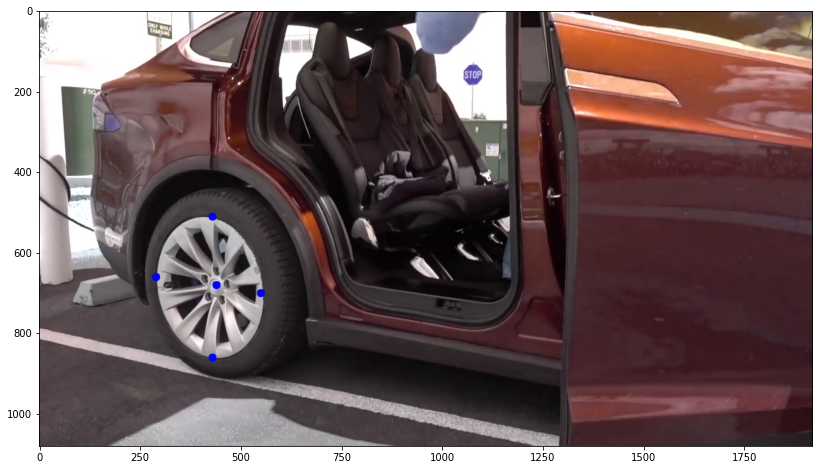

In [14]:
rw_points = {
    'left': (290, 660),
    'right': (550, 700),
    'centre': (440, 680),
    'up': (430, 510),
    'down': (430, 860)
}

img = image.copy()

for key in rw_points.keys():
    img = cv2.circle(img, rw_points[key], radius=10, color=(0, 0, 255), thickness=-1)
    
plt.figure(figsize=(15, 8))
plt.imshow(img)

In [15]:
image = cv2.imread('images/specific_clips/model_x_2/frame21.jpg')

In [16]:
t2_roof_dist = (1660 - 240) * roof_prop + 240

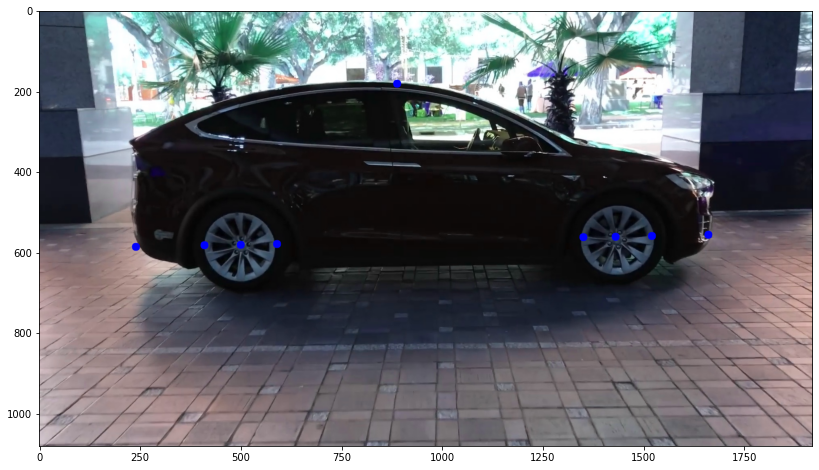

In [17]:
t2_points = {
    'rear_wheel': (500, 580),
    'front_wheel': (1430, 560),
    'roof': (int(t2_roof_dist), 180)
}

m = (t2_points['front_wheel'][1] - t2_points['rear_wheel'][1]) / (t2_points['front_wheel'][0] - t2_points['rear_wheel'][0])

img = image.copy()

img = cv2.circle(img, t2_points['rear_wheel'], radius=10, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, t2_points['front_wheel'], radius=10, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, t2_points['roof'], radius=10, color=(0, 0, 255), thickness=-1)

vehicle_points = [240, 410, 590, 1350, 1520, 1660]

for i, point in enumerate(vehicle_points):
    t2_points[str(i)] = (point, line_eqn(point, m, t2_points['rear_wheel']))
    img = cv2.circle(img, (point, line_eqn(point, m, t2_points['rear_wheel'])), radius=10, color=(0, 0, 255), thickness=-1)
    
plt.figure(figsize=(15, 8))
plt.imshow(img)

In [18]:
imgpoints = [np.array([[list(x)] for x in points.values()]).astype(np.float32),
            np.array([[list(x)] for x in mac_points.values()]).astype(np.float32),
            np.array([[list(x)] for x in rw_points.values()]).astype(np.float32),
            np.array([[list(x)] for x in t2_points.values()]).astype(np.float32)]

objpoints = [
    np.array([
        [0, 0, 0],
        [3737, 0, 0],
        [roof_dist, 1624, 0],
        [(847-wheel_radius), 0, 0],
        [847, 0, 0],
        [(847+wheel_radius), 0, 0],
        [(3737-wheel_radius), 0, 0],
        [(3737+wheel_radius), 0, 0],
        [4751, 0, 0],
    ]).astype(np.float32),
    np.array([
        [0, 0, 0],
        [mac_width, 0, 0],
        [mac_width, mac_depth, 0],
        [0, mac_depth, 0]
    ]).astype(np.float32),
    np.array([
        [0, 0, 0],
        [wheel_diameter, 0, 0],
        [wheel_radius, 0, 0],
        [wheel_radius, wheel_radius, 0],
        [wheel_radius, -wheel_radius, 0]
    ]).astype(np.float32),
    np.array([
        [0, 0, 0],
        [3737, 0, 0],
        [roof_dist, 1624, 0],
        [(847-wheel_radius), 0, 0],
        [847, 0, 0],
        [(847+wheel_radius), 0, 0],
        [(3737-wheel_radius), 0, 0],
        [(3737+wheel_radius), 0, 0],
        [4751, 0, 0],
    ]).astype(np.float32)
            ]

In [19]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [20]:
h,  w = image.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## Camera matrix:

In [21]:
print(newcameramtx)

[[25.07042122  0.         76.82285094]
 [ 0.         29.57957077 81.05939253]
 [ 0.          0.          1.        ]]
